### Reading Indian Financial News dataset and converting it into Global_headlines_df dataframe

In [2]:
import pandas as pd
import numpy as np

# import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [3]:
Indian_title_df = pd.read_csv("IndianFinancialNews1.csv", encoding = "ISO-8859-1")

In [4]:
Indian_title_df.head()

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...


In [5]:
Indian_title_df.iloc[868]


Unnamed: 0                                                   868
Date                                   December 23, 2019, Monday
Title          GST fraud worth Rs 900 crore busted, three sen...
Description    The kingpin and two of his accomplices were ar...
Name: 868, dtype: object

In [6]:
Indian_title_df = Indian_title_df.loc[:,['Date','Title']]

In [7]:
Indian_title_df.head()

,Date,Title
0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d..."
1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...
2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf..."
3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ..."
4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...


In [8]:
Indian_title_df.iloc[868]
#Sample apple news

Date                             December 23, 2019, Monday
Title    GST fraud worth Rs 900 crore busted, three sen...
Name: 868, dtype: object

In [9]:
# Convert time column in date-time format
Indian_title_df['Date'] = pd.to_datetime(Indian_title_df['Date'], utc=True)

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

cs = []
for row in range(len(Indian_title_df)):
    cs.append(analyzer.polarity_scores(Indian_title_df['Title'].iloc[row])['compound'])

Indian_title_df['compound_vader_score'] = cs
Indian_title_df = Indian_title_df[(Indian_title_df[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

Indian_title_df

,Date,Title,compound_vader_score
0,2020-05-26 00:00:00+00:00,"ATMs to become virtual bank branches, accept d...",0.6369
1,2020-05-26 00:00:00+00:00,IDFC First Bank seniors to forgo 65% of bonus ...,-0.1531
2,2020-05-25 00:00:00+00:00,"Huge scam in YES Bank for many years, says Enf...",0.2577
3,2020-05-23 00:00:00+00:00,DCB Bank's profit before tax declines 37.6% to...,0.4404
4,2020-05-22 00:00:00+00:00,"Retail, MSME loans to get cheaper as RBI cuts ...",-0.0258
...,...,...,...
22436,2003-02-12 00:00:00+00:00,Fitch Affirms India Ratings Despite Deficit,0.3089
22437,2003-02-12 00:00:00+00:00,"Mfg Data, War Fears Scythe Gilts",-0.7717
22438,2003-02-12 00:00:00+00:00,Irda Nixes Increase In First-Year Commission T...,0.3182
22439,2003-02-11 00:00:00+00:00,Crisil Scripts Risk Gauge Tool For Film Industry,-0.2732


In [11]:
# Converts dataframe into a downloadable csv
Indian_title_df.to_csv('Indian_title_df.csv')

### Extracting Banking companies

In [12]:
# global_headlines_df
Indian_title_df_corrected = pd.read_csv("Indian_title_df.csv", encoding = "ISO-8859-1", chunksize=10000)

# Create empty lists
axis_data = []
hdfc_data = []
icici_data = []
kotak_data = []
sbi_data = []
indusind_data = []


In [13]:
type(Indian_title_df_corrected)

pandas.io.parsers.TextFileReader

In [14]:
for df in Indian_title_df_corrected:
    # Select the headlines with the word 'apple' or 'aapl'
    data = df.loc[(df.Title.str.contains('axis', case=False))|(df.Title.str.contains('AXS', case=False))]
    # Append the data into the empty aapl_data created
    axis_data.append(data)

    # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.Title.str.contains('hdfc', case=False))|(df.Title.str.contains('HDB', case=False))]
    # Append the data into the empty amzn_data created
    hdfc_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.Title.str.contains('icici', case=False))|(df.Title.str.contains('IBN', case=False))]
    # Append the data into the empty msft_data created
    icici_data.append(data)
    
    # Select the headlines with the word 'apple' or 'aapl'
    data = df.loc[(df.Title.str.contains('kotak', case=False))|(df.Title.str.contains('KOTAKBANK', case=False))]
    # Append the data into the empty aapl_data created
    kotak_data.append(data)

    # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.Title.str.contains('sbi', case=False))|(df.Title.str.contains('SBIN', case=False))]
    # Append the data into the empty amzn_data created
    sbi_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.Title.str.contains('indusind', case=False))|(df.Title.str.contains('INDUSINDBK', case=False))]
    # Append the data into the empty msft_data created
    indusind_data.append(data)

In [15]:
axis_data

[      Unnamed: 0                       Date  \
 41            41  2020-05-06 00:00:00+00:00   
 52            52  2020-05-02 00:00:00+00:00   
 254          254  2020-03-13 00:00:00+00:00   
 293          293  2020-03-09 00:00:00+00:00   
 311          311  2020-03-09 00:00:00+00:00   
 ...          ...                        ...   
 9410        9410  2013-01-17 00:00:00+00:00   
 9416        9416  2013-01-16 00:00:00+00:00   
 9957        9957  2012-10-18 00:00:00+00:00   
 9968        9968  2012-10-17 00:00:00+00:00   
 9973        9973  2012-10-16 00:00:00+00:00   
 
                                                   Title  compound_vader_score  
 41    Axis Bank's Q4 loss reflects rise in systemic ...               -0.5267  
 52    Fitch affirms Axis Bank's IDR at BB-plus with ...                0.2960  
 254   ICICI Bank, HDFC, Kotak and Axis Bank join SBI...                0.6841  
 293   YES Bank crisis: Axis Trustee moves HC against...                0.0857  
 311   YES Bank f

In [16]:
hdfc_data

[      Unnamed: 0                       Date  \
 59            59  2020-04-28 00:00:00+00:00   
 81            81  2020-04-21 00:00:00+00:00   
 89            89  2020-04-18 00:00:00+00:00   
 108          108  2020-04-12 00:00:00+00:00   
 136          136  2020-04-02 00:00:00+00:00   
 ...          ...                        ...   
 9571        9571  2012-12-21 00:00:00+00:00   
 9646        9646  2012-12-09 00:00:00+00:00   
 9890        9890  2012-10-31 00:00:00+00:00   
 9938        9938  2012-10-23 00:00:00+00:00   
 9957        9957  2012-10-18 00:00:00+00:00   
 
                                                   Title  compound_vader_score  
 59    Promoter, PE stake may go up in private banks;...                0.5267  
 81    HDFC cuts prime lending rate by 15 bps; move t...                0.2023  
 89    HDFC Bank board finalises Aditya Puri's succes...                0.2263  
 108   China central bank hikes stake in HDFC amid a ...                0.2960  
 136   Covid-19 r

In [17]:
icici_data

[      Unnamed: 0                       Date  \
 25            25  2020-05-09 00:00:00+00:00   
 182          182  2020-03-23 00:00:00+00:00   
 213          213  2020-03-17 00:00:00+00:00   
 254          254  2020-03-13 00:00:00+00:00   
 256          256  2020-03-13 00:00:00+00:00   
 ...          ...                        ...   
 9603        9603  2012-12-14 00:00:00+00:00   
 9680        9680  2012-12-05 00:00:00+00:00   
 9977        9977  2012-10-15 00:00:00+00:00   
 9990        9990  2012-10-11 00:00:00+00:00   
 9992        9992  2012-10-11 00:00:00+00:00   
 
                                                   Title  compound_vader_score  
 25    ICICI Bank pre-tax profit up 82% in Q4; provid...                0.4404  
 182   Statsguru: From SBI to ICICI Bank, lenders com...                0.7739  
 213   ICICI Bank gets 7.97% stake in YES Bank with R...                0.5319  
 254   ICICI Bank, HDFC, Kotak and Axis Bank join SBI...                0.6841  
 256   ICICI Bank

In [18]:
kotak_data

[      Unnamed: 0                       Date  \
 21            21  2020-05-13 00:00:00+00:00   
 254          254  2020-03-13 00:00:00+00:00   
 483          483  2020-01-30 00:00:00+00:00   
 894          894  2019-10-22 00:00:00+00:00   
 1387        1387  2019-04-30 00:00:00+00:00   
 1612        1612  2019-01-17 00:00:00+00:00   
 1709        1709  2018-12-17 00:00:00+00:00   
 1742        1742  2018-12-10 00:00:00+00:00   
 1947        1947  2018-10-24 00:00:00+00:00   
 2716        2716  2018-03-20 00:00:00+00:00   
 3844        3844  2017-04-28 00:00:00+00:00   
 4083        4083  2017-01-25 00:00:00+00:00   
 4162        4162  2016-12-24 00:00:00+00:00   
 4250        4250  2016-11-17 00:00:00+00:00   
 4392        4392  2016-10-06 00:00:00+00:00   
 4740        4740  2016-06-27 00:00:00+00:00   
 4792        4792  2016-06-06 00:00:00+00:00   
 4894        4894  2016-05-13 00:00:00+00:00   
 4898        4898  2016-05-12 00:00:00+00:00   
 4991        4991  2016-04-15 00:00:00+0

In [19]:
sbi_data

[      Unnamed: 0                       Date  \
 24            24  2020-05-10 00:00:00+00:00   
 26            26  2020-05-09 00:00:00+00:00   
 27            27  2020-05-09 00:00:00+00:00   
 31            31  2020-05-08 00:00:00+00:00   
 34            34  2020-05-07 00:00:00+00:00   
 ...          ...                        ...   
 9980        9980  2012-10-14 00:00:00+00:00   
 9982        9982  2012-10-13 00:00:00+00:00   
 9988        9988  2012-10-12 00:00:00+00:00   
 9991        9991  2012-10-11 00:00:00+00:00   
 9997        9997  2012-10-11 00:00:00+00:00   
 
                                                   Title  compound_vader_score  
 24    Not offering any emergency loan through YONO p...                0.4738  
 26    Rs 411-crore fraud: SBI approaches CBI as thre...               -0.5859  
 27    Covid-19 impact: SBI Cards' pre-tax profit dip...                0.4404  
 31    Covid-19 crisis: It's time for concrete reviva...               -0.6249  
 34    SBI cuts l

In [20]:
indusind_data

[      Unnamed: 0                       Date  \
 59            59  2020-04-28 00:00:00+00:00   
 62            62  2020-04-27 00:00:00+00:00   
 147          147  2020-03-30 00:00:00+00:00   
 178          178  2020-03-24 00:00:00+00:00   
 210          210  2020-03-18 00:00:00+00:00   
 ...          ...                        ...   
 9655        9655  2012-12-07 00:00:00+00:00   
 9735        9735  2012-11-27 00:00:00+00:00   
 9740        9740  2012-11-27 00:00:00+00:00   
 9963        9963  2012-10-17 00:00:00+00:00   
 9998        9998  2012-10-11 00:00:00+00:00   
 
                                                   Title  compound_vader_score  
 59    Promoter, PE stake may go up in private banks;...                0.5267  
 62    IndusInd Bank reports 18% yoy dip in pre-tax p...                0.4404  
 147   IndusInd Bank updates analysts on coronavirus ...               -0.5423  
 178   Rebuilding confidence, asset quality: Kathpali...                0.7003  
 210   IndusInd B

In [21]:
# Concat data together
axis_data = pd.concat(axis_data)
hdfc_data = pd.concat(hdfc_data)
icici_data = pd.concat(icici_data)
kotak_data = pd.concat(kotak_data)
sbi_data = pd.concat(sbi_data)
indusind_data = pd.concat(indusind_data)


###  HDFC Bank

In [23]:
hdfc_data 

,Unnamed: 0,Date,Title,compound_vader_score
59,59,2020-04-28 00:00:00+00:00,"Promoter, PE stake may go up in private banks;...",0.5267
81,81,2020-04-21 00:00:00+00:00,HDFC cuts prime lending rate by 15 bps; move t...,0.2023
89,89,2020-04-18 00:00:00+00:00,HDFC Bank board finalises Aditya Puri's succes...,0.2263
108,108,2020-04-12 00:00:00+00:00,China central bank hikes stake in HDFC amid a ...,0.2960
136,136,2020-04-02 00:00:00+00:00,Covid-19 relief: HDFC Bank releases FAQ on def...,0.4767
...,...,...,...,...
21979,21979,2003-09-27 00:00:00+00:00,HDFC Bank aims at 30% growth,0.3818
22115,22115,2003-07-26 00:00:00+00:00,"Hdfc, Canara Cut Floating Rate 25 Bps",-0.2732
22152,22152,2003-07-03 00:00:00+00:00,Hdfc Cuts Fixed-Rate Loan Interest By 25 Basis...,0.2023
22255,22255,2003-05-09 00:00:00+00:00,Hdfc Standard Life Reports 260% Growth,0.3818


### ICICI Bank

In [24]:
icici_data

,Unnamed: 0,Date,Title,compound_vader_score
25,25,2020-05-09 00:00:00+00:00,ICICI Bank pre-tax profit up 82% in Q4; provid...,0.4404
182,182,2020-03-23 00:00:00+00:00,"Statsguru: From SBI to ICICI Bank, lenders com...",0.7739
213,213,2020-03-17 00:00:00+00:00,ICICI Bank gets 7.97% stake in YES Bank with R...,0.5319
254,254,2020-03-13 00:00:00+00:00,"ICICI Bank, HDFC, Kotak and Axis Bank join SBI...",0.6841
256,256,2020-03-13 00:00:00+00:00,"ICICI Bank to invest Rs 1,000 cr in Yes Bank; ...",0.4019
...,...,...,...,...
22145,22145,2003-07-09 00:00:00+00:00,ICICI Bank sells Rs 2000 crore corporate asset...,0.1779
22324,22324,2003-04-14 00:00:00+00:00,Icici Bank Feels Pain Of Gashes Left By Co-Ops,-0.5106
22339,22339,2003-04-09 00:00:00+00:00,Labour Pain Makes Icici Bank Think Separation,-0.5106
22357,22357,2003-03-29 00:00:00+00:00,Icici Bank Buys Credit Card Unit Of Tata Fin,0.3818


### KOTAK Bank

In [25]:
kotak_data

,Unnamed: 0,Date,Title,compound_vader_score
21,21,2020-05-13 00:00:00+00:00,Kotak Bank profit before tax slips 10.6% at Rs...,0.4404
254,254,2020-03-13 00:00:00+00:00,"ICICI Bank, HDFC, Kotak and Axis Bank join SBI...",0.6841
483,483,2020-01-30 00:00:00+00:00,RBI accepts Kotak Bank promoters' plan to cap ...,0.3182
894,894,2019-10-22 00:00:00+00:00,Kotak Mahindra Bank profit surges,0.4404
1387,1387,2019-04-30 00:00:00+00:00,Kotak Mahindra Bank consolidated Q4 net profit...,0.4404
...,...,...,...,...
21346,21346,2004-05-26 00:00:00+00:00,"Kotak Bank offers 1:1 bonus, net doubles",0.5423
21629,21629,2004-02-11 00:00:00+00:00,OM Kotak Life eyes 300% increase in premiums,0.3182
21631,21631,2004-02-11 00:00:00+00:00,Gujarat tops Kotak Bank business agenda,0.5106
21671,21671,2004-01-28 00:00:00+00:00,Kotak Bank Q3 profit rockets 68%,0.4404


### SBI Bank

In [26]:
sbi_data

,Unnamed: 0,Date,Title,compound_vader_score
24,24,2020-05-10 00:00:00+00:00,Not offering any emergency loan through YONO p...,0.4738
26,26,2020-05-09 00:00:00+00:00,Rs 411-crore fraud: SBI approaches CBI as thre...,-0.5859
27,27,2020-05-09 00:00:00+00:00,Covid-19 impact: SBI Cards' pre-tax profit dip...,0.4404
31,31,2020-05-08 00:00:00+00:00,Covid-19 crisis: It's time for concrete reviva...,-0.6249
34,34,2020-05-07 00:00:00+00:00,"SBI cuts lending rate by 15 bps, launches sche...",-0.2960
...,...,...,...,...
22173,22173,2003-06-20 00:00:00+00:00,"Sbi Group Clocks Rs 4,199 Crore Fy03 Profit",0.4404
22203,22203,2003-06-07 00:00:00+00:00,"Sbi Operating Profit Seen At Rs 6,570 Crore Fo...",0.4404
22268,22268,2003-05-03 00:00:00+00:00,"Ge Caps, Sbi Extend Ties To Insurance",0.1779
22321,22321,2003-04-15 00:00:00+00:00,Sbi Says No To Ifci Takeover,-0.2960


### IndusInd Bank

In [27]:
indusind_data

,Unnamed: 0,Date,Title,compound_vader_score
59,59,2020-04-28 00:00:00+00:00,"Promoter, PE stake may go up in private banks;...",0.5267
62,62,2020-04-27 00:00:00+00:00,IndusInd Bank reports 18% yoy dip in pre-tax p...,0.4404
147,147,2020-03-30 00:00:00+00:00,IndusInd Bank updates analysts on coronavirus ...,-0.5423
178,178,2020-03-24 00:00:00+00:00,"Rebuilding confidence, asset quality: Kathpali...",0.7003
210,210,2020-03-18 00:00:00+00:00,IndusInd Bank says it is financially strong am...,0.5106
...,...,...,...,...
20429,20429,2005-05-12 00:00:00+00:00,Leyland lowers IndusInd Bank stake by 2.8%,-0.1280
20502,20502,2005-04-13 00:00:00+00:00,IndusInd Bank FY05 credit growth at 45%,0.6369
21077,21077,2004-08-13 00:00:00+00:00,RBI directs IndusInd to drop PwC,-0.2732
21111,21111,2004-08-05 00:00:00+00:00,IndusInd to drop large corporate accounts,-0.2732


In [28]:
indusind_data.loc[indusind_data['compound_vader_score'] < 0, 'action_suggested'] = 'sell'
indusind_data.loc[indusind_data['compound_vader_score'] > 0, 'action_suggested'] = 'buy'

In [29]:
indusind_data

,Unnamed: 0,Date,Title,compound_vader_score,action_suggested
59,59,2020-04-28 00:00:00+00:00,"Promoter, PE stake may go up in private banks;...",0.5267,buy
62,62,2020-04-27 00:00:00+00:00,IndusInd Bank reports 18% yoy dip in pre-tax p...,0.4404,buy
147,147,2020-03-30 00:00:00+00:00,IndusInd Bank updates analysts on coronavirus ...,-0.5423,sell
178,178,2020-03-24 00:00:00+00:00,"Rebuilding confidence, asset quality: Kathpali...",0.7003,buy
210,210,2020-03-18 00:00:00+00:00,IndusInd Bank says it is financially strong am...,0.5106,buy
...,...,...,...,...,...
20429,20429,2005-05-12 00:00:00+00:00,Leyland lowers IndusInd Bank stake by 2.8%,-0.1280,sell
20502,20502,2005-04-13 00:00:00+00:00,IndusInd Bank FY05 credit growth at 45%,0.6369,buy
21077,21077,2004-08-13 00:00:00+00:00,RBI directs IndusInd to drop PwC,-0.2732,sell
21111,21111,2004-08-05 00:00:00+00:00,IndusInd to drop large corporate accounts,-0.2732,sell


In [30]:
indusind_data.loc[indusind_data['compound_vader_score'] < 0, 'sentiment_class'] = 'Negative'
indusind_data.loc[indusind_data['compound_vader_score'] > 0, 'sentiment_class'] = 'Positive'

In [51]:
indusind_data.head()

,Unnamed: 0,Date,Title,compound_vader_score,action_suggested,sentiment_class
59,59,2020-04-28 00:00:00+00:00,"Promoter, PE stake may go up in private banks;...",0.5267,buy,Positive
62,62,2020-04-27 00:00:00+00:00,IndusInd Bank reports 18% yoy dip in pre-tax p...,0.4404,buy,Positive
147,147,2020-03-30 00:00:00+00:00,IndusInd Bank updates analysts on coronavirus ...,-0.5423,sell,Negative
178,178,2020-03-24 00:00:00+00:00,"Rebuilding confidence, asset quality: Kathpali...",0.7003,buy,Positive
210,210,2020-03-18 00:00:00+00:00,IndusInd Bank says it is financially strong am...,0.5106,buy,Positive


In [57]:
indusind_data_0= indusind_data.loc[:,['Title','compound_vader_score','sentiment_class','action_suggested']]

In [58]:
indusind_data_0

,Title,compound_vader_score,sentiment_class,action_suggested
59,"Promoter, PE stake may go up in private banks;...",0.5267,Positive,buy
62,IndusInd Bank reports 18% yoy dip in pre-tax p...,0.4404,Positive,buy
147,IndusInd Bank updates analysts on coronavirus ...,-0.5423,Negative,sell
178,"Rebuilding confidence, asset quality: Kathpali...",0.7003,Positive,buy
210,IndusInd Bank says it is financially strong am...,0.5106,Positive,buy
...,...,...,...,...
20429,Leyland lowers IndusInd Bank stake by 2.8%,-0.1280,Negative,sell
20502,IndusInd Bank FY05 credit growth at 45%,0.6369,Positive,buy
21077,RBI directs IndusInd to drop PwC,-0.2732,Negative,sell
21111,IndusInd to drop large corporate accounts,-0.2732,Negative,sell


In [32]:
indusind_data_1= indusind_data.loc[:,['sentiment_class','compound_vader_score']]

In [33]:
indusind_data_1

,sentiment_class,compound_vader_score
59,Positive,0.5267
62,Positive,0.4404
147,Negative,-0.5423
178,Positive,0.7003
210,Positive,0.5106
...,...,...
20429,Negative,-0.1280
20502,Positive,0.6369
21077,Negative,-0.2732
21111,Negative,-0.2732


In [40]:
indusind_data_1.to_csv('indusind_data_1.csv')

In [34]:
import matplotlib.pyplot as plt

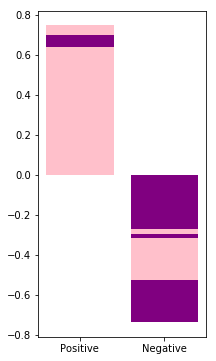

In [35]:
plt.figure(figsize=(3, 6))

plt.bar(indusind_data_1['sentiment_class'], indusind_data_1['compound_vader_score'], color=['Pink','purple'])
plt.show()

In [59]:
indusind_data_3 = indusind_data.loc[:,['compound_vader_score','action_suggested']]

In [60]:
indusind_data_3

,compound_vader_score,action_suggested
59,0.5267,buy
62,0.4404,buy
147,-0.5423,sell
178,0.7003,buy
210,0.5106,buy
...,...,...
20429,-0.1280,sell
20502,0.6369,buy
21077,-0.2732,sell
21111,-0.2732,sell


In [61]:
indusind_data_3.to_csv('indusind_data_3.csv')

In [38]:
import matplotlib.pyplot as plt

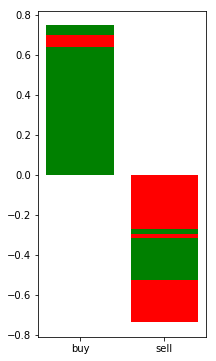

In [39]:
plt.figure(figsize=(3, 6))

plt.bar(indusind_data_2 ['action_suggested'], indusind_data_2 ['compound_vader_score'], color=['green','red'])
plt.show()

### This jupyter file is for Indian_Title_df. Banking companies are being focused here. Top 5 companies from the banking sector have been decided on buy and sell depending on the compound score and sentiment class. 


